In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
## Para el agua gaseosa 
A=30.092
B=6.832
C=6.793
D=-2.53448
E=0.082139

deltaH_298=-241.826 #kJ/mol
deltaS_298=188.835  #J/mol

dT=0.1
T=np.arange(300,400,dT) #se esta generando una matriz con los datos (el T es la T en kelvin) #se cabio 1700 por 400
t=T/1000
Cp_H2O_gas=A+B*t+C*t**2+D*t**3+E/t**2  #(J/mol)
deltaH_gas=np.cumsum(Cp_H2O_gas*dT)+deltaH_298*1000  #se utiliza para calcular H 
deltaS_gas=np.cumsum(Cp_H2O_gas/T*dT)+deltaS_298
deltaG_gas=deltaH_gas-T*deltaS_gas

In [23]:
##Para el agua liquida _H2O_gas
A=-203.606
B=1523.290
C=-3196.413
D=2474.455
E=3.855

deltaH_298=-285.830 #kJ/mol
deltaS_298=69.95 #J/mol

dT=0.1
T=np.arange(300,400,dT) #se esta generando una matriz con los datos (el T es la T en kelvin)#se cabio 1700 por 400  
                          #"punto donde las lineas en las graficas se cruzan"
t=T/1000
Cp_H2O_liq=A+B*t+C*t**2+D*t**3+E/t**2  #(J/mol)
deltaH_liq=np.cumsum(Cp_H2O_liq*dT)+deltaH_298*1000  #se utiliza para calcular H 
deltaS_liq=np.cumsum(Cp_H2O_liq/T*dT)+deltaS_298
deltaG_liq=deltaH_liq-T*deltaS_liq

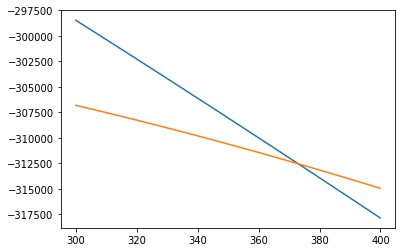

In [24]:
plt.plot(T,deltaG_gas)
plt.plot(T, deltaG_liq)
plt.show()
#punto donde se cruzan, corresponde al punto de ebullición del agua en (373 K).
# en ese punto G del gas es igual a la G del liquido: Ggas=Giq


In [31]:
dp=(deltaG_gas-deltaG_liq)**2
dp
 #minimo de la parabola
#preguntamos donde dp es igual al minimo 
minimo=np.min(dp)
np.where(dp==minimo)

(array([730]),)

In [32]:
T[730]

373.0000000000166

# NO2 

In [34]:
import requests

In [53]:

url="https://janaf.nist.gov/tables/N-007.txt"
file=requests.get(url)
datos=file.text
datos=datos.split("\n")[3:-1] #partimos los datos donde encontremos /n, luego los corchetes se utilizan para eliminar
#las dos primeras linas aliminando el nombre.
mat=[] #se utiliza mat para cambiar la tabla en numeros 
for x in datos:
    s=x.split("\t")
    print(s)
    mat.append([float(a) for a in (s)]) #pasa de lista de cadena a punto flotante
mat=np.array(mat)


['100', '33.276', '202.563', '271.168', '-6.861', '34.898', '39.963', '-20.874']
['200', '34.385', '225.852', '243.325', '-3.495', '33.897', '45.422', '-11.863']
['250', '35.593', '233.649', '240.634', '-1.746', '33.460', '48.355', '-10.103']
['298.15', '36.974', '240.034', '240.034', '0.', '33.095', '51.258', '-8.980']
['300', '37.029', '240.262', '240.034', '0.068', '33.083', '51.371', '-8.944']
['350', '38.583', '246.086', '240.491', '1.958', '32.768', '54.445', '-8.125']
['400', '40.171', '251.342', '241.524', '3.927', '32.512', '57.560', '-7.517']
['450', '41.728', '256.164', '242.886', '5.975', '32.310', '60.703', '-7.046']
['500', '43.206', '260.638', '244.440', '8.099', '32.154', '63.867', '-6.672']
['600', '45.834', '268.755', '247.830', '12.555', '31.959', '70.230', '-6.114']
['700', '47.986', '275.988', '251.345', '17.250', '31.878', '76.616', '-5.717']
['800', '49.708', '282.512', '254.840', '22.138', '31.874', '83.008', '-5.420']
['900', '51.076', '288.449', '258.250', '27

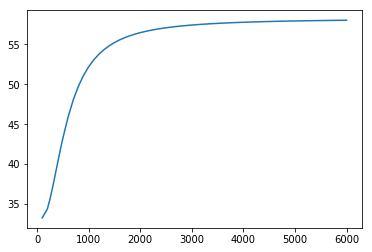

In [54]:
T=mat[:,0]
Cp=mat[:,1]
plt.plot(T,Cp)
plt.show()

## N2O4

In [55]:
T=T[3:16] #columna por #de fila del valor que deseamos 
y=Cp[3:16]
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T #arreglo para x con traspuesta y arreglo de nymp
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y)) #x transpuesta por x
beta


array([ 16.10851352,  75.89539116, -54.3872296 ,  14.30775044,
         0.23942371])

In [56]:
Cp_calc=beta.dot(X.T)

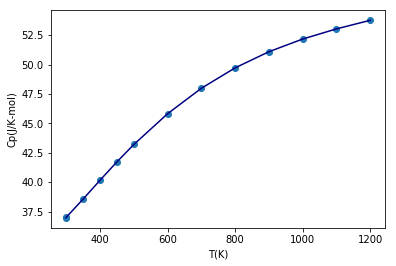

In [59]:
plt.scatter(T,y)
plt.plot(T,Cp_calc,color="navy")
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.show()